<a href="https://colab.research.google.com/github/jeonuenseo/eunseo/blob/master/11_hello_mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MNIST 분류기

In [89]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

In [90]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [91]:
X_train.shape

(60000, 28, 28)

In [92]:
Y_train.shape

(60000,)

In [93]:
Y_train[1]

0

In [94]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255

In [95]:
Y_train[3]

1

In [96]:
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)

In [97]:
input_size = 784
batch_size = 100
hidden_neurons = 400
epochs = 5

In [98]:
model = Sequential()
model.add(Dense(hidden_neurons, input_dim=input_size)) 
model.add(Activation('relu'))     
model.add(Dense(classes)) 
model.add(Activation('softmax'))

In [99]:
#model = Sequential()
#model.add(Dense(classes)) 
#model.add(Activation('softmax')) 위의 코드가 더 잘나옴

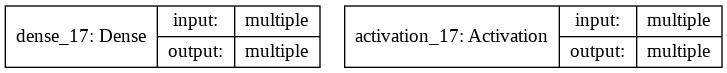

In [100]:
from keras.utils import plot_model
plot_model(model, to_file='model_mnist.png', show_shapes=True)

In [101]:
model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adadelta')

In [102]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.5954 - accuracy: 0.8511
Epoch 2/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.3388 - accuracy: 0.9063
Epoch 3/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.3098 - accuracy: 0.9138
Epoch 4/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.2965 - accuracy: 0.9177
Epoch 5/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.2881 - accuracy: 0.9195


In [103]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1]) 


10000/10000 [==============================] - 0s 22us/step

Test accuracy: 0.921999990940094
